# Plots

Here is a graph made with totally fabricated data because I enjoy doing data visualisation and even though I don’t have the data yet, I do have a pretty graph.

ℹ Please use the `linewidth` aesthetic instead.

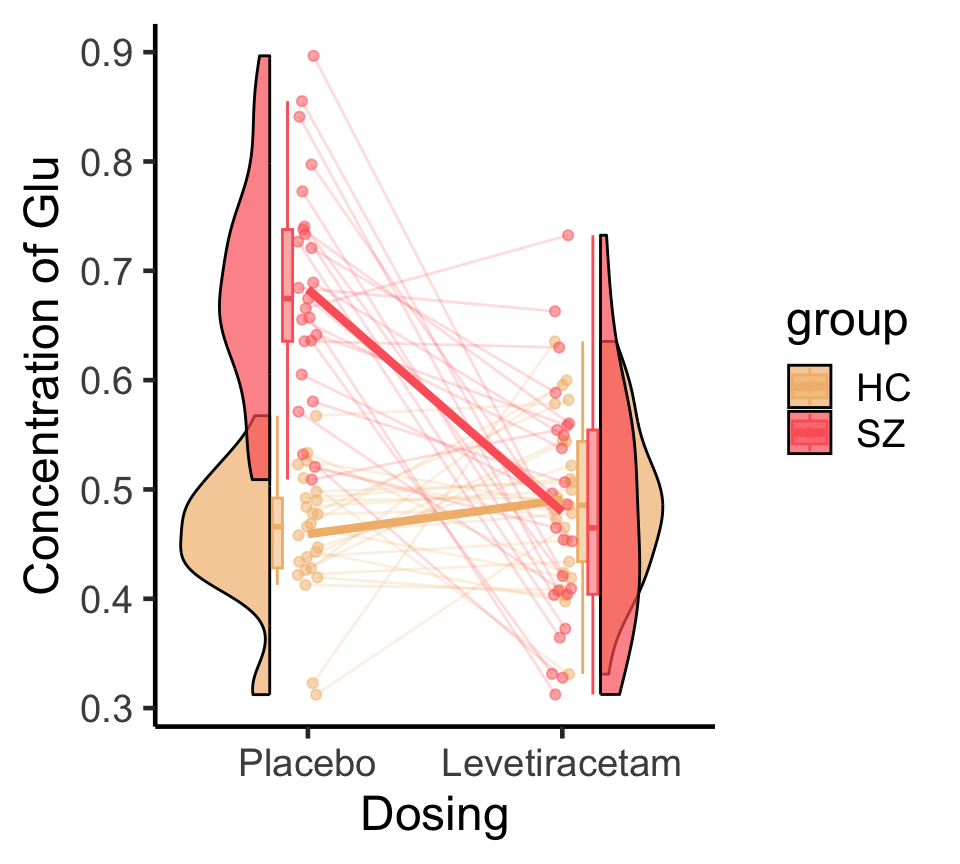

In [ ]:
library(ggplot2)
library(ggrain)
library(wesanderson)

glx <- c(rnorm(25, mean=0.45, sd=0.10), rnorm(25, mean=0.45, sd=0.09), rnorm(25, mean=0.69, sd=0.11), rnorm(25, mean=0.45, sd=0.11))
group <- c(replicate(50, "HC"), replicate(50, "SZ"))
dosing <- c(replicate(25, "Placebo"), replicate(25, "Drug"), replicate(25, "Placebo"), replicate(25, "Drug"))
id <- c(replicate(2, 101:125), replicate(2, 201:225))

data <- data.frame(id, group, dosing, glx)
data$dosing <- factor(data$dosing, levels = c('Placebo', 'Drug'))
data$group <- factor(data$group, levels = c('HC', 'SZ'))

colour_map <- "Pastel1"
pal <- wes_palette("GrandBudapest1", n=2, type = "discrete")
# wes_palette("GrandBudapest1", type = "discrete", n=2)

# jpeg(file="files/rain_plot.jpeg", height = 5000, width = 4500, res=400)

rainplot <- ggplot(data[data$dosing %in% c('Placebo', 'Drug'),], aes(dosing, glx, fill = group, color=group)) +
    geom_rain(alpha = .5, rain.side = 'f2x2', id.long.var = "id",
            violin.args = list(color = "black", alpha = .7)) +
    stat_summary(fun = mean, geom = "line", aes(group = group, color = group), lwd=1.5) +
    # stat_summary(fun = mean, geom = "point", aes(group = group, color = group)) +
    labs(
        # title = "Comparison of GLX levels change between\nplacebo and levetiracetam in HC and SZ",
        x = "Dosing",
        y = "Concentration of Glu"
    ) +
    scale_x_discrete(labels = c('Placebo','Levetiracetam')) +
    theme_classic(base_size = 18) +
    theme(plot.title = element_text(hjust = 0.5), legend.position="right") +
    scale_fill_manual(values = pal) +
    scale_color_manual(values = pal) +
    guides(fill = guide_legend()) 


Here is a gantt chart depicting the plan for my PhD:

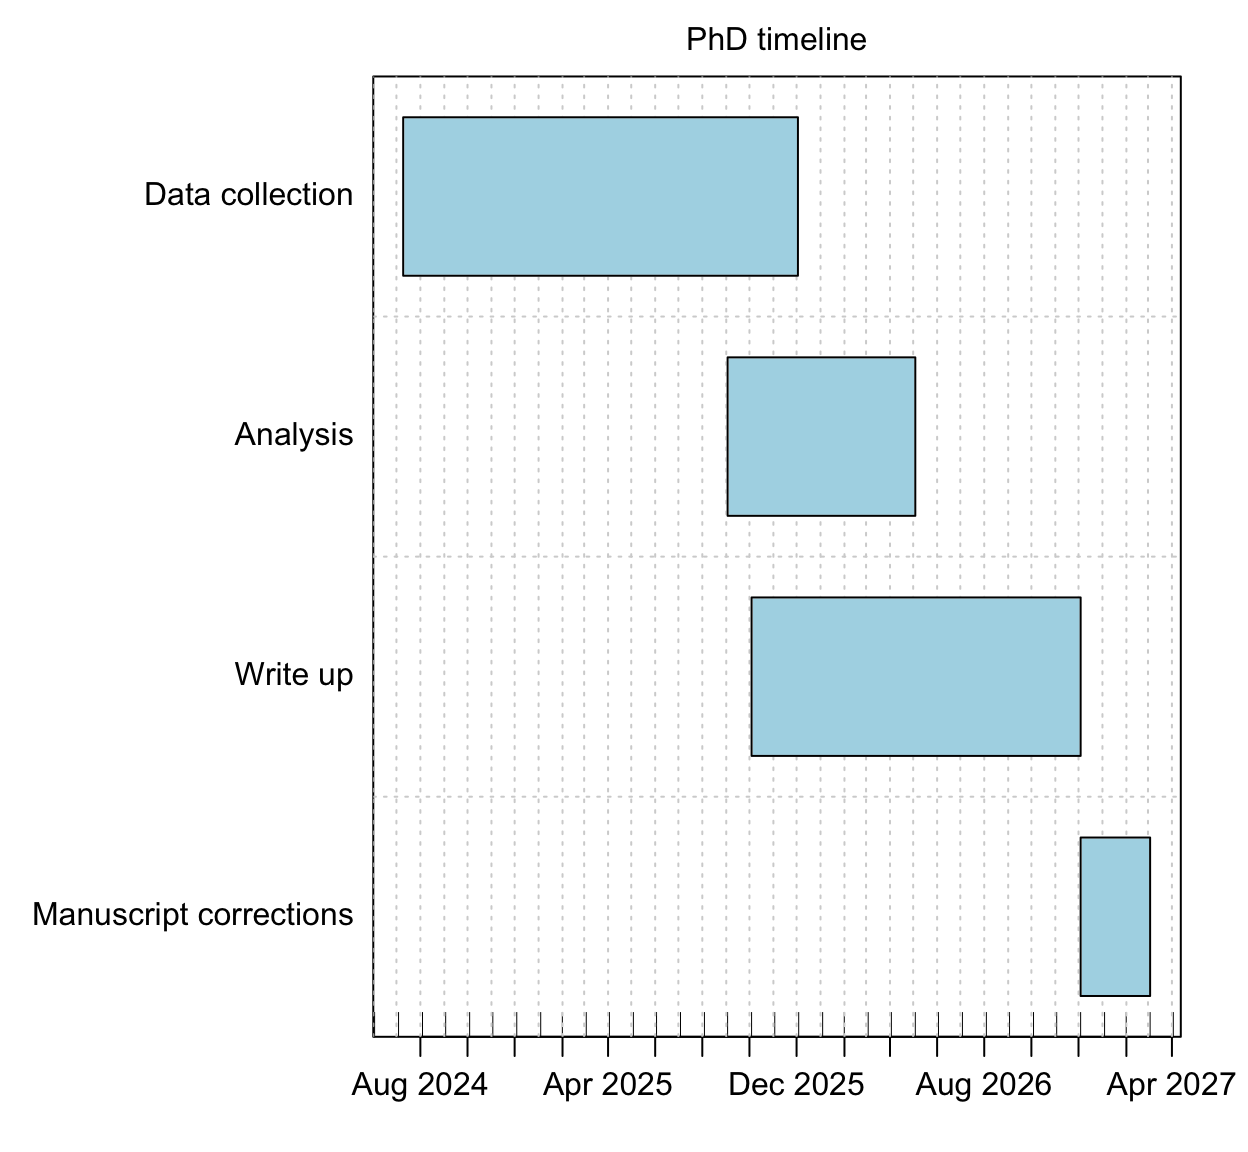

In [ ]:
library(plan)

gt_object <- read.gantt("gantt.csv") 

plot(gt_object,
    # event.label='Report Date', event.time='2024-08-27',
    col.event=c("red"),
    col.done=c("lightblue"),
    col.notdone=c("lightblue"),
    time.labels.by="2 months",
    time.lines.by="1 month",
    main="PhD timeline"
    )
